In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 


In [49]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [50]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
for i in df.columns :
    if df[i].dtype == "object" :
        df[i] = df[i].str.lower()
        df[i] = df[i].str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [52]:
df = df.drop(["market_category"], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11812 non-null  object 
 1   model              11812 non-null  object 
 2   year               11812 non-null  int64  
 3   engine_fuel_type   11812 non-null  object 
 4   engine_hp          11812 non-null  float64
 5   engine_cylinders   11812 non-null  float64
 6   transmission_type  11812 non-null  object 
 7   driven_wheels      11812 non-null  object 
 8   number_of_doors    11812 non-null  float64
 9   vehicle_size       11812 non-null  object 
 10  vehicle_style      11812 non-null  object 
 11  highway_mpg        11812 non-null  int64  
 12  city_mpg           11812 non-null  int64  
 13  popularity         11812 non-null  int64  
 14  msrp               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


C:\Users\Abd-el-Rahman\AppData\Local\Temp\ipykernel_15180\3762546680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

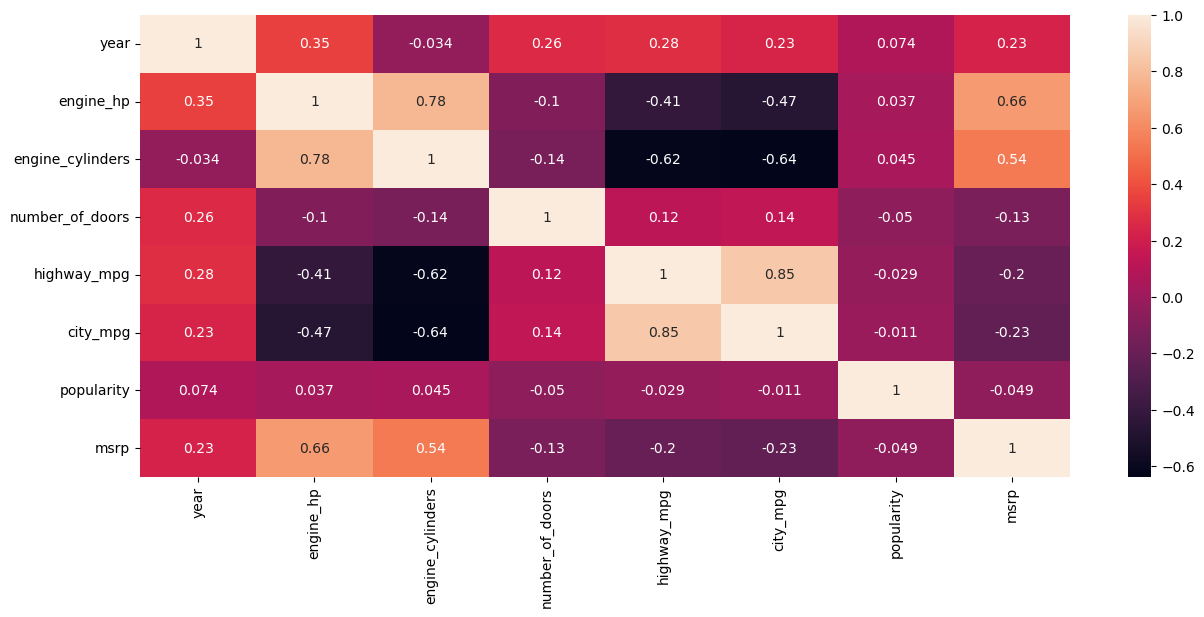

In [53]:
plt.figure(figsize=((15, 6)))
sns.heatmap(df.corr(), annot=True)

C:\Users\Abd-el-Rahman\AppData\Local\Temp\ipykernel_15180\408458340.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

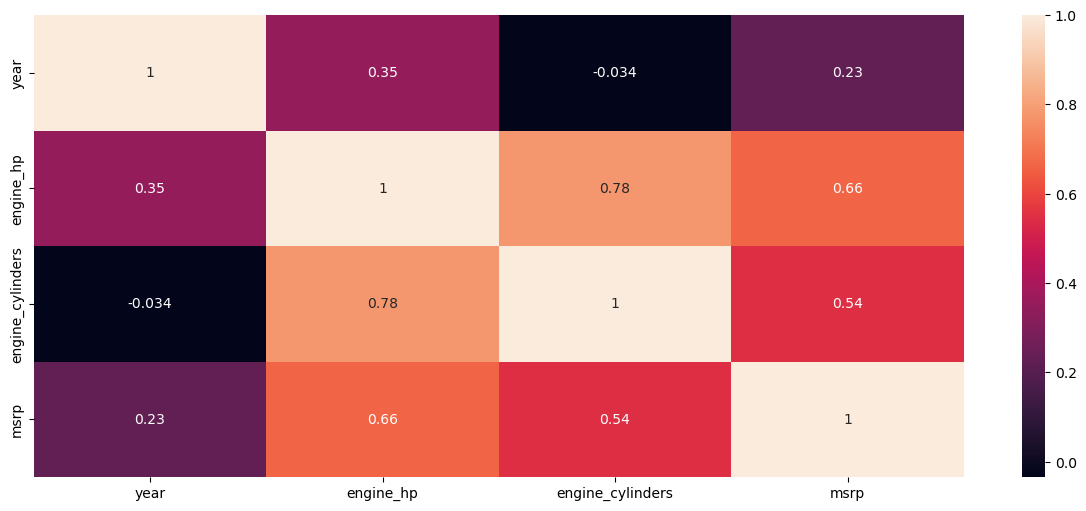

In [54]:
df = df.drop(['number_of_doors', 'highway_mpg', 'city_mpg', 'popularity'], axis=1)
plt.figure(figsize=((15, 6)))
sns.heatmap(df.corr(), annot=True)

In [55]:
df.describe()

,year,engine_hp,engine_cylinders,msrp
count,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,4.055994e+04
std,7.594647,109.206947,1.751646,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,2.065902e+06


<Axes: xlabel='msrp', ylabel='Count'>

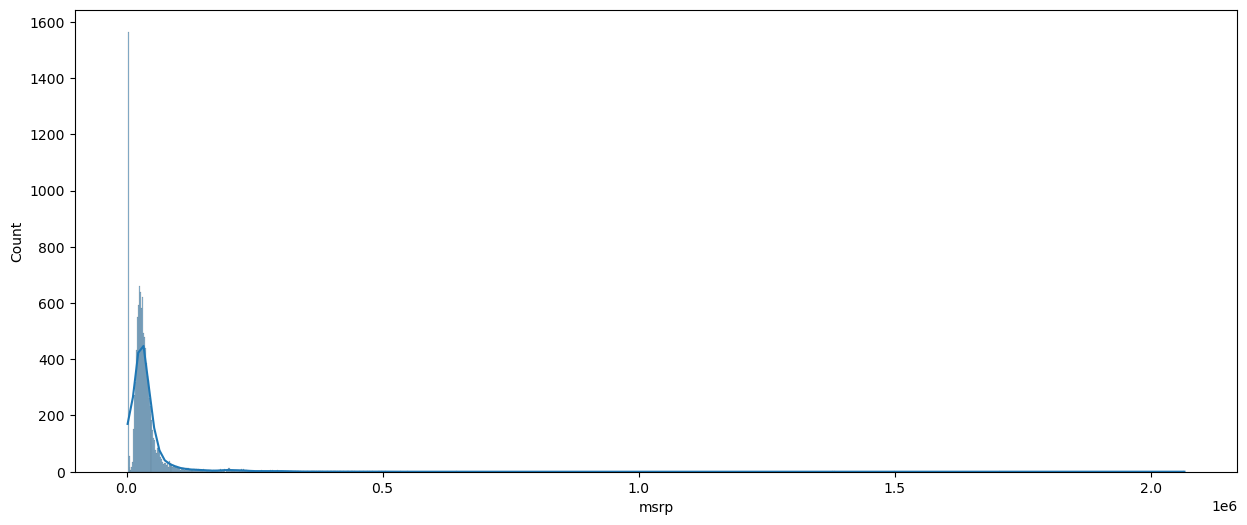

In [56]:
plt.figure(figsize=((15, 6)))
sns.histplot(df['msrp'], kde=True)

<Axes: xlabel='msrp', ylabel='Count'>

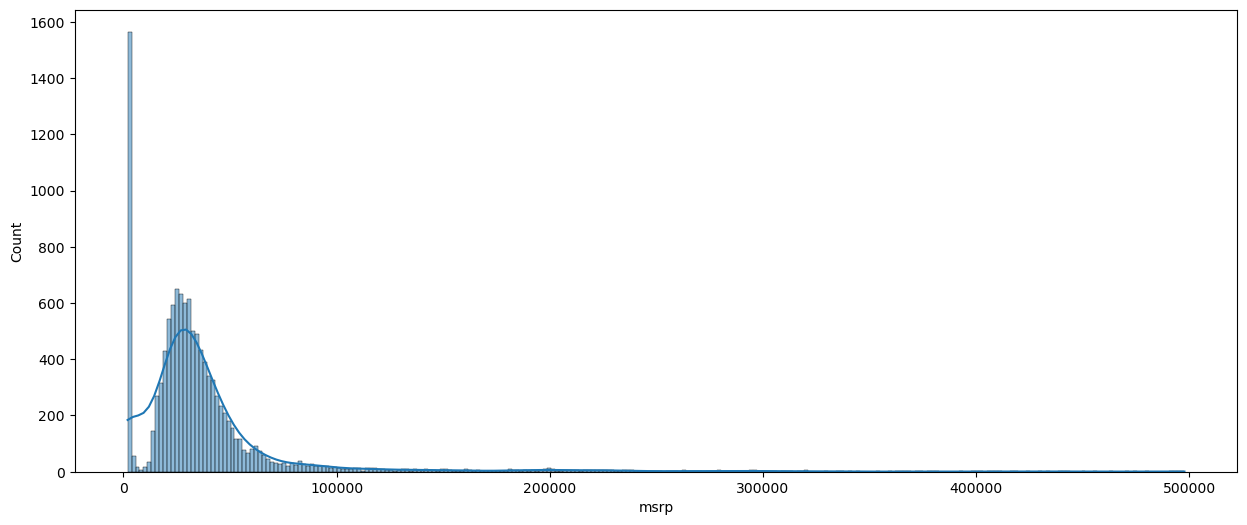

In [57]:
df = df[df["msrp"]<0.5e06]
plt.figure(figsize=((15, 6)))
sns.histplot(df['msrp'], kde=True)

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

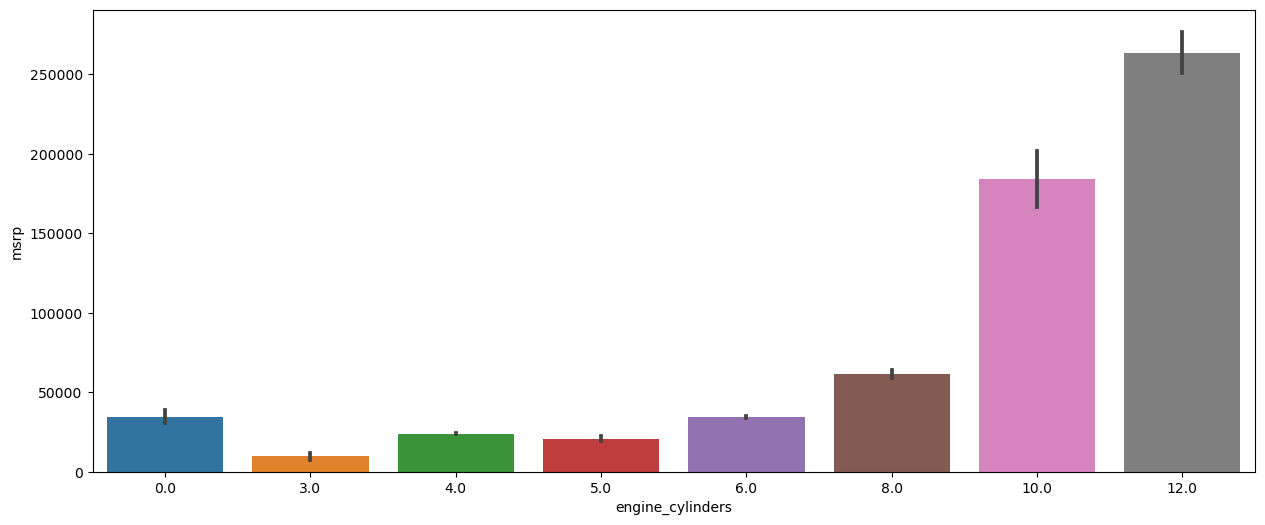

In [58]:
plt.figure(figsize=((15, 6)))
sns.barplot(x=df['engine_cylinders'], y=df['msrp'])

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

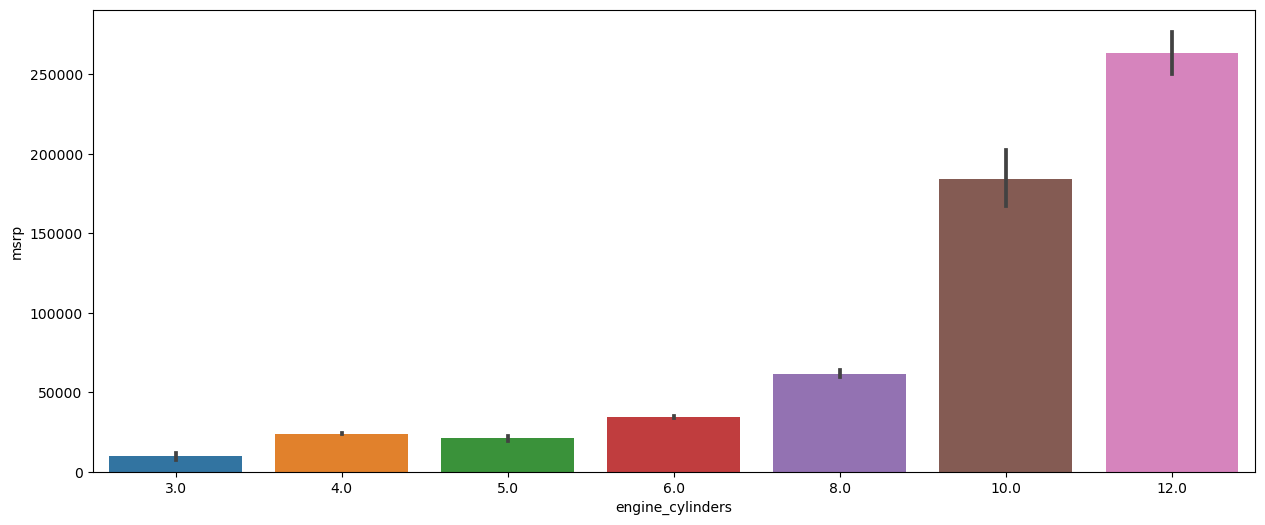

In [59]:
df = df[df['engine_cylinders']!=0]
plt.figure(figsize=((15, 6)))
sns.barplot(x=df['engine_cylinders'], y=df['msrp'])

<Axes: xlabel='engine_hp', ylabel='msrp'>

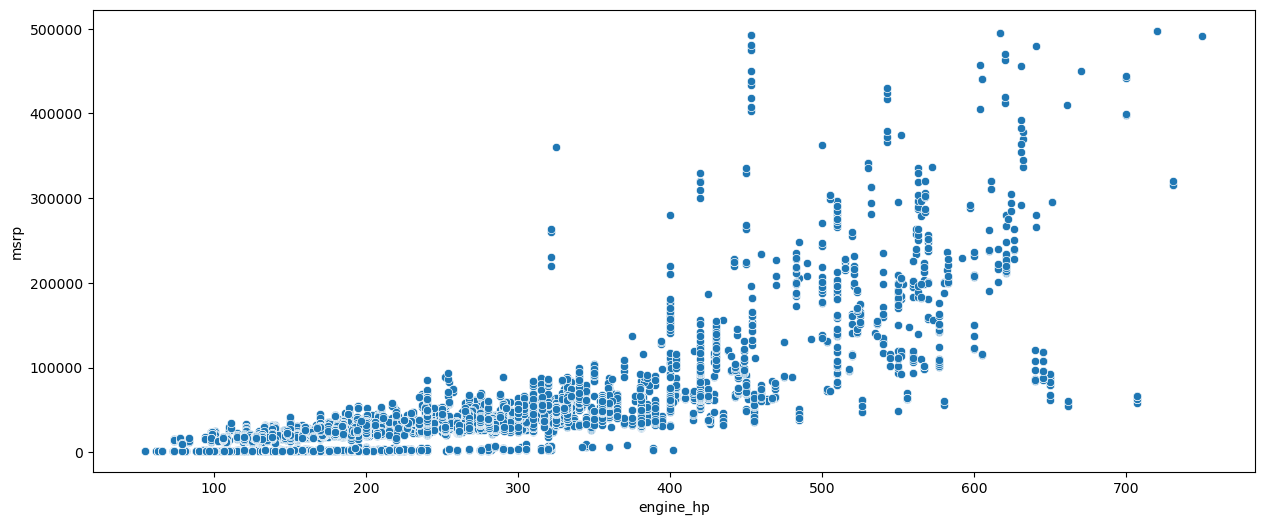

In [60]:
plt.figure(figsize=((15, 6)))
sns.scatterplot(x=df['engine_hp'], y=df['msrp'])

<Axes: xlabel='engine_hp', ylabel='msrp'>

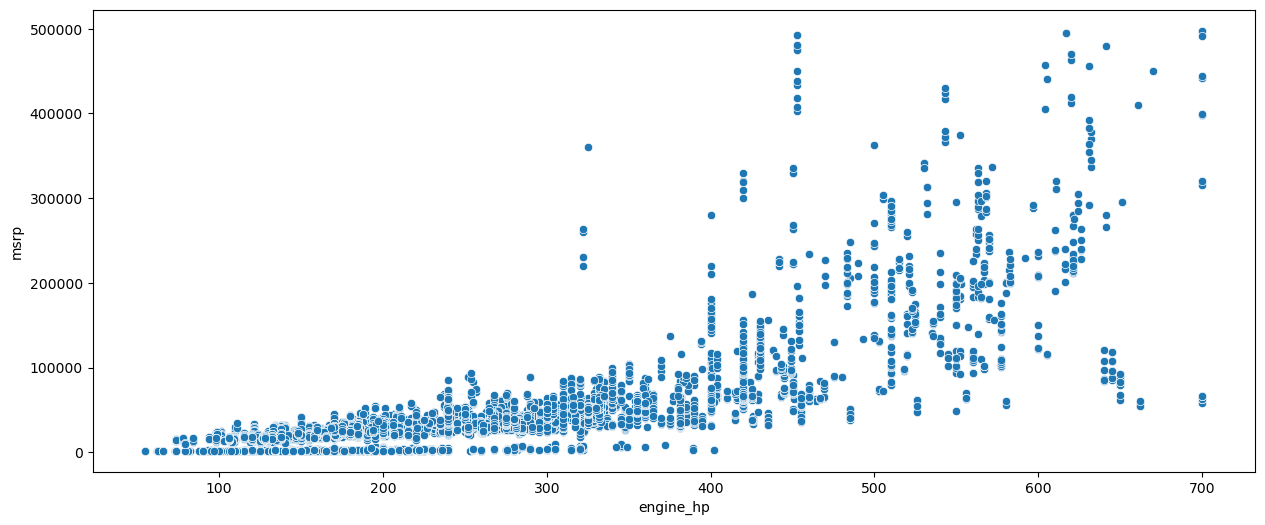

In [61]:
df['engine_hp'] = np.where(df['engine_hp']>700, 700, df['engine_hp'])
plt.figure(figsize=((15, 6)))
sns.scatterplot(x=df['engine_hp'], y=df['msrp'])

<Axes: xlabel='year', ylabel='msrp'>

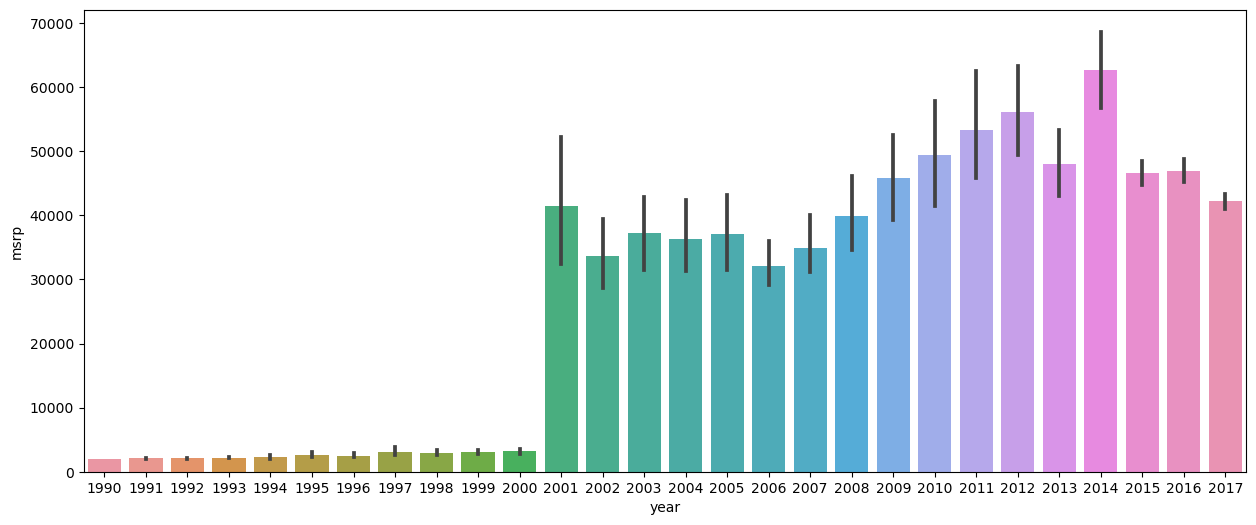

In [62]:
plt.figure(figsize=((15, 6)))
sns.barplot(x=df['year'], y=df['msrp'])

In [63]:
df.describe()

,year,engine_hp,engine_cylinders,msrp
count,11788.000000,11788.000000,11788.000000,11788.000000
mean,2010.355786,249.109009,5.648711,39559.547845
std,7.599502,107.966920,1.727620,47716.759274
min,1990.000000,55.000000,3.000000,2000.000000
25%,2007.000000,170.000000,4.000000,20965.000000
50%,2015.000000,227.000000,6.000000,29947.500000
75%,2016.000000,300.000000,6.000000,42150.000000
max,2017.000000,700.000000,12.000000,497650.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11788 non-null  object 
 1   model              11788 non-null  object 
 2   year               11788 non-null  int64  
 3   engine_fuel_type   11788 non-null  object 
 4   engine_hp          11788 non-null  float64
 5   engine_cylinders   11788 non-null  float64
 6   transmission_type  11788 non-null  object 
 7   driven_wheels      11788 non-null  object 
 8   vehicle_size       11788 non-null  object 
 9   vehicle_style      11788 non-null  object 
 10  msrp               11788 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [65]:
df['engine_fuel_type'].nunique()

8

<Axes: xlabel='make', ylabel='msrp'>

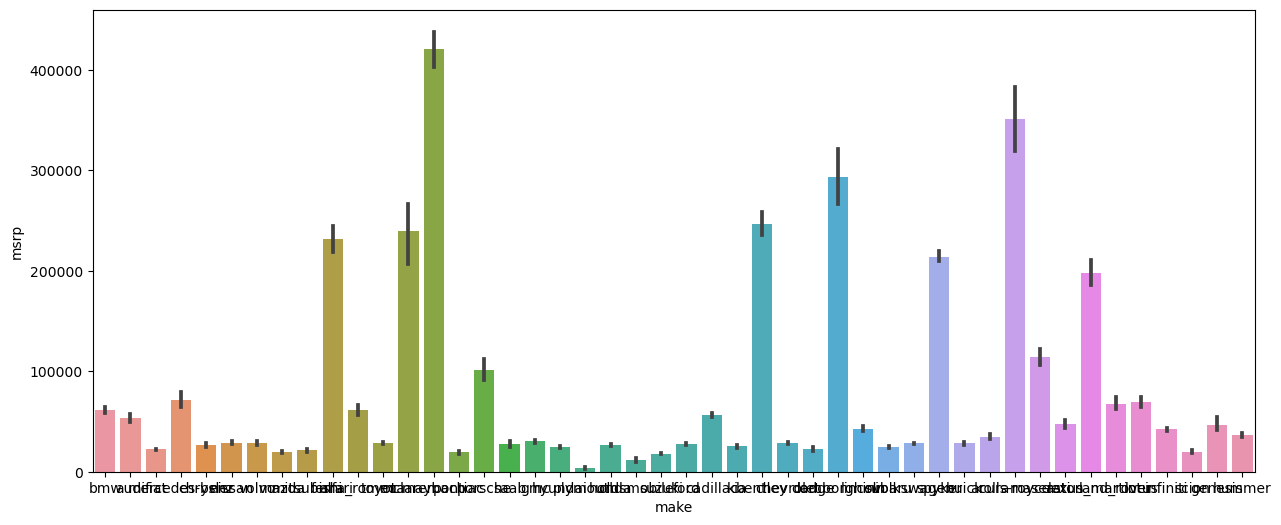

In [66]:
plt.figure(figsize=((15, 6)))
sns.barplot(x=df['make'], y=df['msrp'])

In [67]:
df = pd.get_dummies(df, columns=['make', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style', 'engine_fuel_type'])
df = df.drop(['model'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11913
Data columns (total 86 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           11788 non-null  int64  
 1   engine_hp                                                      11788 non-null  float64
 2   engine_cylinders                                               11788 non-null  float64
 3   msrp                                                           11788 non-null  int64  
 4   make_acura                                                     11788 non-null  uint8  
 5   make_alfa_romeo                                                11788 non-null  uint8  
 6   make_aston_martin                                              11788 non-null  uint8  
 7   make_audi                                                 

In [68]:
x = df.drop(['msrp'], axis=1)
y = df['msrp']
my_model = LinearRegression()
my_model.fit(x, y)
my_model.score(x, y)

0.8706697550751519